In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


In [2]:
def obrada(month, step):
    #step definira koja je granica za rupu
    #čitanje csva, izračun prvog i zadnjeg 'trenutka' mjeseca
    df=pd.read_csv("{}_2022.csv".format(month),usecols=['id','time'], encoding='latin1')
    end=pd.to_datetime("2022-{}-01 23:59:59".format(month+1))-pd.Timedelta(days=1)
    beginning=pd.to_datetime("2022-{}-01 00:00:00".format(month))
    #nijedan podatak nije zabiljezen u mjesecu
    if df.empty:
        df=pd.DataFrame({'time1':[beginning], 'time2':[end], 'diff':[end-beginning]})
        return df
    df['time']=pd.to_datetime(df['time'])
    #izračun razmaka među mjerenjima
    df['diff'] = df['time'].diff(periods=1)
    #izračun razmaka između poč. mjeseca i prvog mjerenja
    df.loc[0,'diff']=df.loc[0, 'time'] - beginning
    #izračun razmaka između kraja mjeseca i zadnjeg mjerenja
    df.loc[len(df)] = {'diff':end - df.loc[len(df)-1, 'time'], 'time' : end}
    df['index'] = range(len(df))
    #filtiranje samo redaka čiji je diff veci od odabranog step-a (i njihovih prethodnika)
    df4=df[df['diff'] > step]
    previous_row = df4['index'] - 1
    result = pd.concat([df[df['index'].isin(previous_row) ], df4])
    result.sort_index(inplace=True, ignore_index=True)

    if(result.empty):
        print("nema rupa")
        return result
    if result.loc[0,'index']==0:
        #prvi red ima rupu od poč. mjeseca
        new_df=pd.DataFrame({'time1':[beginning], 'time2':[result.loc[0,'time']], 'diff':[result.loc[0,'diff']]})
        new_df=pd.concat([new_df,pd.DataFrame({
        'time1': result['time'].iloc[1::2].reset_index(drop=True),
        'time2': result['time'].iloc[2::2].reset_index(drop=True),
        'diff': result['diff'].iloc[2::2].reset_index(drop=True)
        })], ignore_index=True)
    else:
        #nema rupe od poč. mjeseca, uzimam parove redaka
        new_df = pd.DataFrame({
            'time1': result['time'].iloc[0::2].reset_index(drop=True),
            'time2': result['time'].iloc[1::2].reset_index(drop=True),
            'diff': result['diff'].iloc[1::2].reset_index(drop=True)
        })
    return new_df

end=pd.to_datetime("2022-{}-01 23:59:59".format(month+1))-pd.Timedelta(days=1)
beginning=pd.to_datetime("2022-{}-01 00:00:00".format(month))
all_timestamps = pd.date_range(start=beginning, end=end, freq='120S')


is_within_interval_list = [
    any((timestamp >= row['time1']) and (timestamp <= row['time2']) for i, row in df.iterrows())
    for timestamp in all_timestamps
]

plt.plot(all_timestamps, is_within_interval_list)
tick_positions = pd.date_range(start=beginning, end=end, freq='1D')
plt.xticks(tick_positions, [timestamp.strftime('%Y-%m-%d') for timestamp in tick_positions], rotation=45, ha='right', fontsize=8)
plt.xticks(rotation=45, ha='right', fontsize=8)  

plt.xlabel('Timestamp', fontsize=10) 
plt.ylabel('Is within interval (1 or 0)')
plt.title('Scatter Plots of Timestamps within Intervals for the Entire Month')

fig = plt.gcf()
fig.set_size_inches(20, 6)  # Adjust the width and height as needed
plt.savefig('responsive_plot.png', dpi=300, bbox_inches='tight')

plt.show()

In [8]:
def make_graph(month, step):
    df=obrada(month,step)
    print("{}. mjesec".format(month))
    print(df)
    end=pd.to_datetime("2022-{}-01 23:59:59".format(month+1))-pd.Timedelta(days=1)
    beginning=pd.to_datetime("2022-{}-01 00:00:00".format(month))
    all_timestamps = pd.date_range(start=beginning, end=end, freq='120S')
    is_within_interval_list = [
        any((timestamp >= row['time1']) and (timestamp <= row['time2']) for i, row in df.iterrows())
        for timestamp in all_timestamps
    ]
    fig, ax = plt.subplots()  # Create a new figure and axis for each month
    ax.plot(all_timestamps, is_within_interval_list, linewidth=1)
    tick_positions = pd.date_range(start=beginning, end=end, freq='1D')
    ax.set_xticks(tick_positions)
    ax.set_xticklabels([timestamp.strftime('%Y-%m-%d') for timestamp in tick_positions], rotation=45, ha='right', fontsize=8)
    
    ax.set_xlabel('Timestamp', fontsize=10)
    ax.set_title("Graf rupa u podacima većih od {} za {}. mjesec".format(step, month))
    
    fig.set_size_inches(20, 6)  # Adjust the width and height as needed
    plt.savefig("{}m_graph.png".format(month), dpi=600, bbox_inches='tight')
    
    #plt.show()
    return

4. mjesec
                  time1               time2            diff
0   2022-04-01 00:00:00 2022-04-07 14:13:36 6 days 14:13:36
1   2022-04-07 14:30:04 2022-04-07 14:35:12 0 days 00:05:08
2   2022-04-07 14:35:17 2022-04-07 14:51:20 0 days 00:16:03
3   2022-04-07 14:51:25 2022-04-07 14:52:31 0 days 00:01:06
4   2022-04-07 14:53:31 2022-04-07 15:10:11 0 days 00:16:40
..                  ...                 ...             ...
130 2022-04-26 10:33:43 2022-04-26 10:33:55 0 days 00:00:12
131 2022-04-27 09:46:09 2022-04-27 09:54:37 0 days 00:08:28
132 2022-04-27 11:42:33 2022-04-27 11:48:46 0 days 00:06:13
133 2022-04-27 11:51:10 2022-04-27 11:56:35 0 days 00:05:25
134 2022-04-29 23:59:59 2022-04-30 23:59:59 1 days 00:00:00

[135 rows x 3 columns]
5. mjesec
                 time1               time2            diff
0  2022-05-02 16:53:42 2022-05-02 17:00:37 0 days 00:06:55
1  2022-05-03 14:46:17 2022-05-03 14:46:27 0 days 00:00:10
2  2022-05-04 03:37:41 2022-05-04 09:31:16 0 days 05:53:35


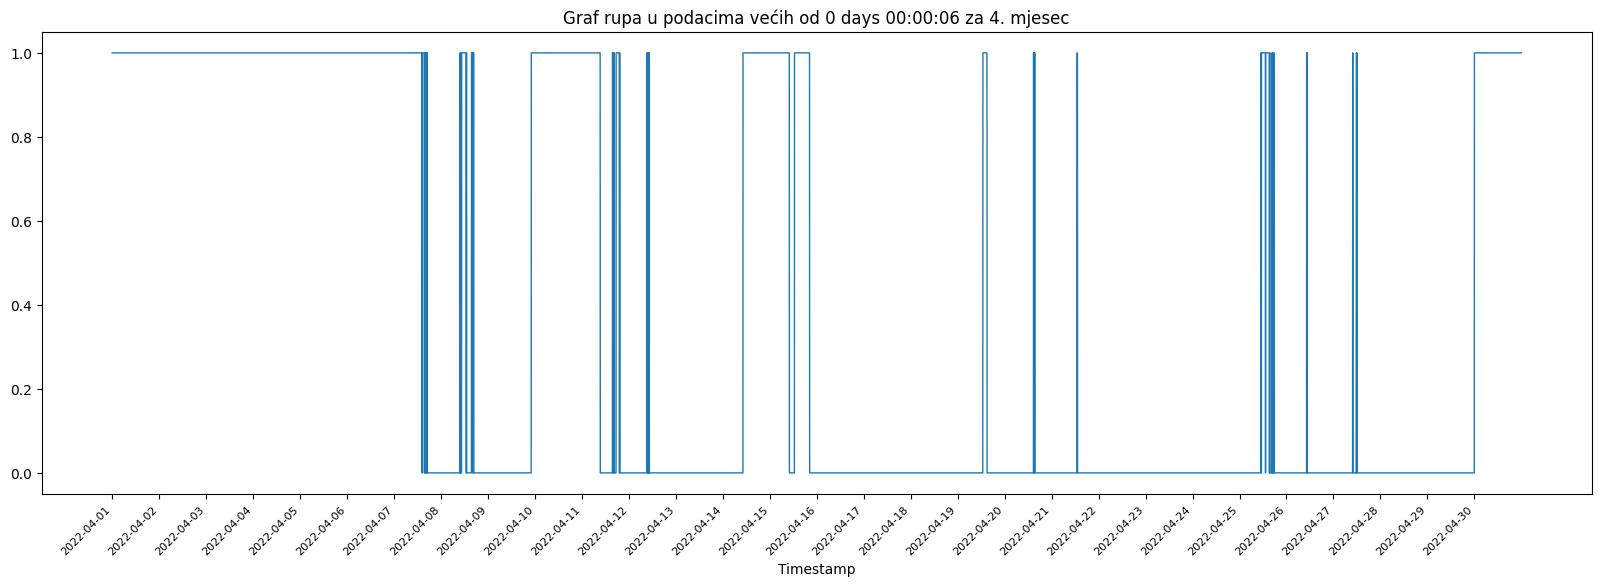

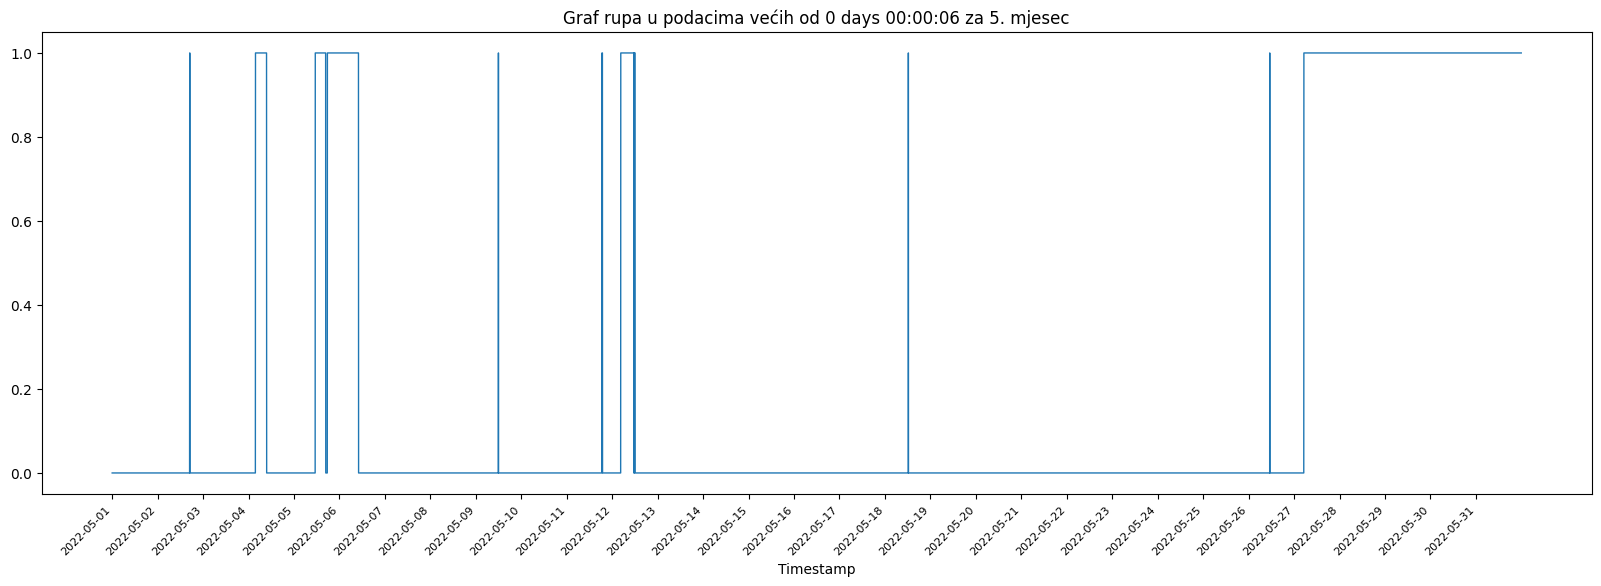

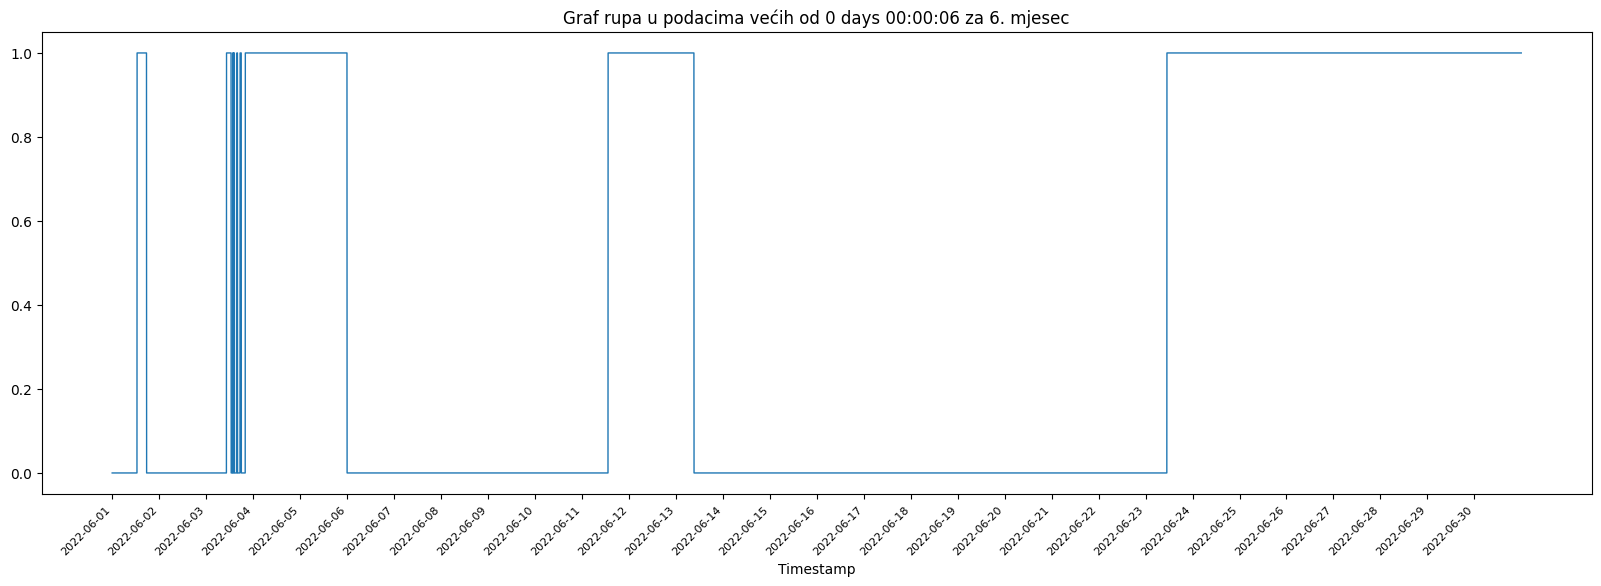

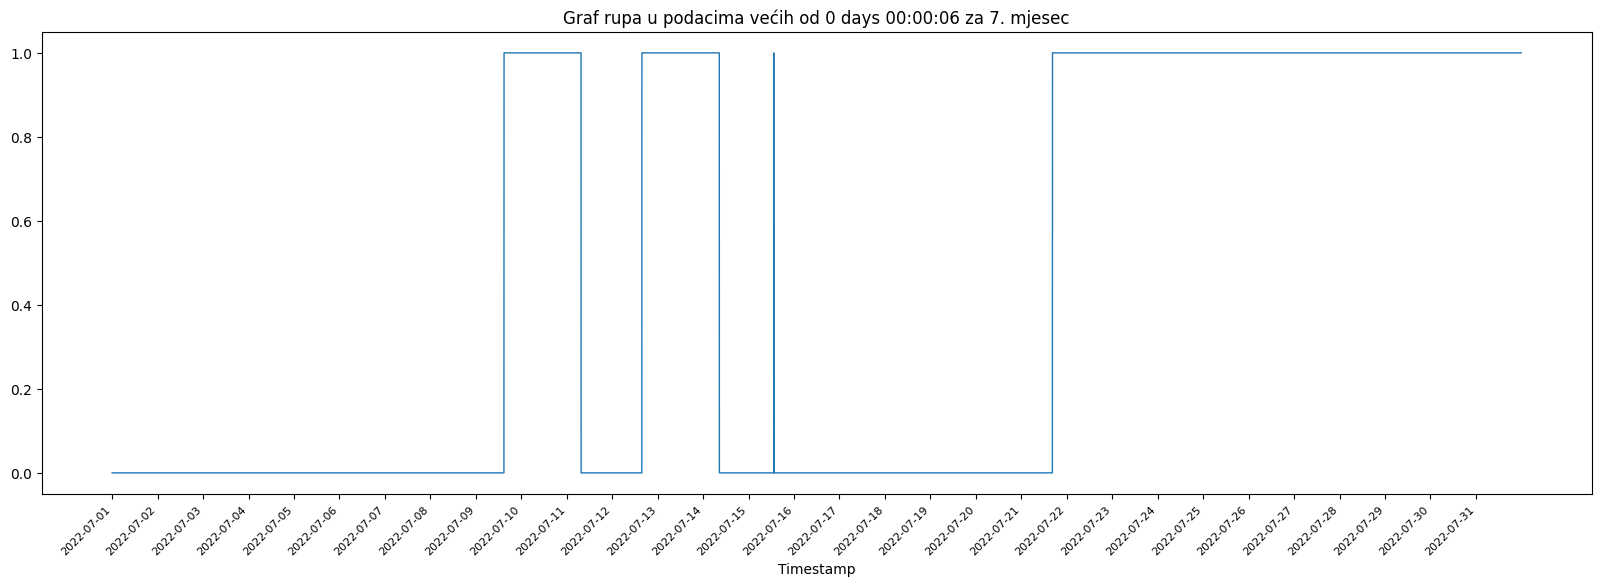

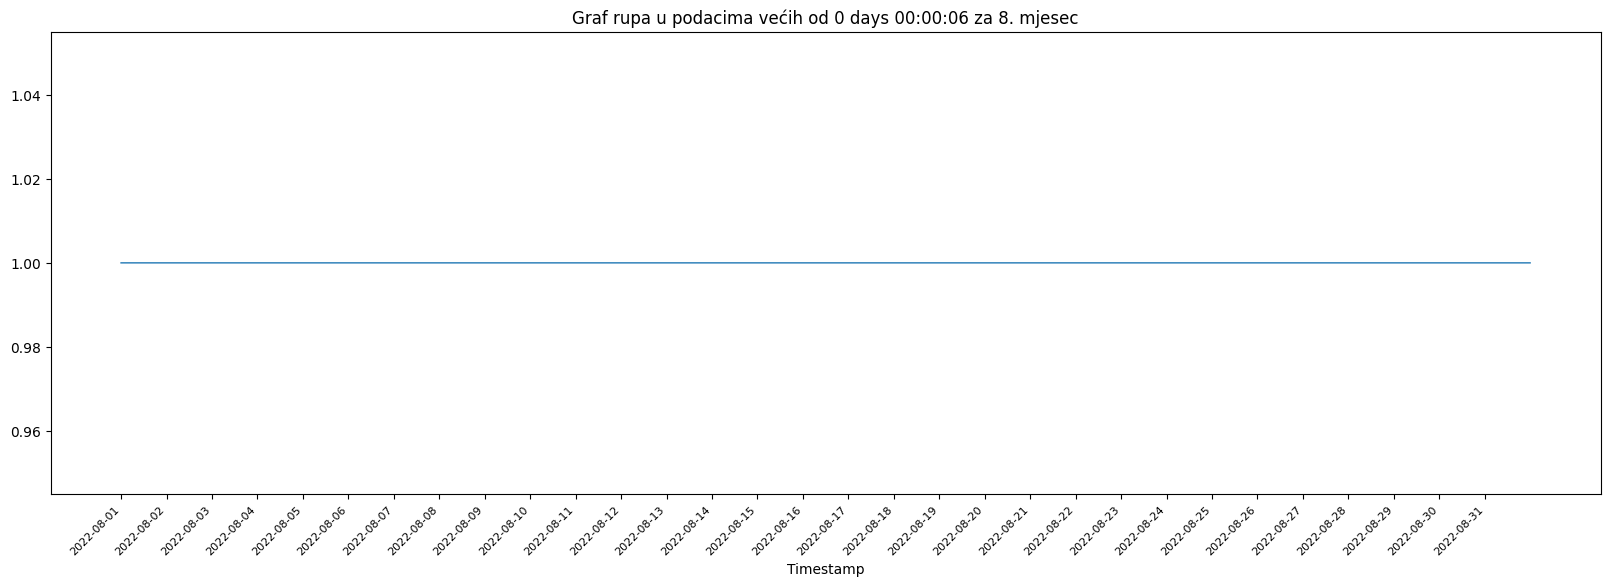

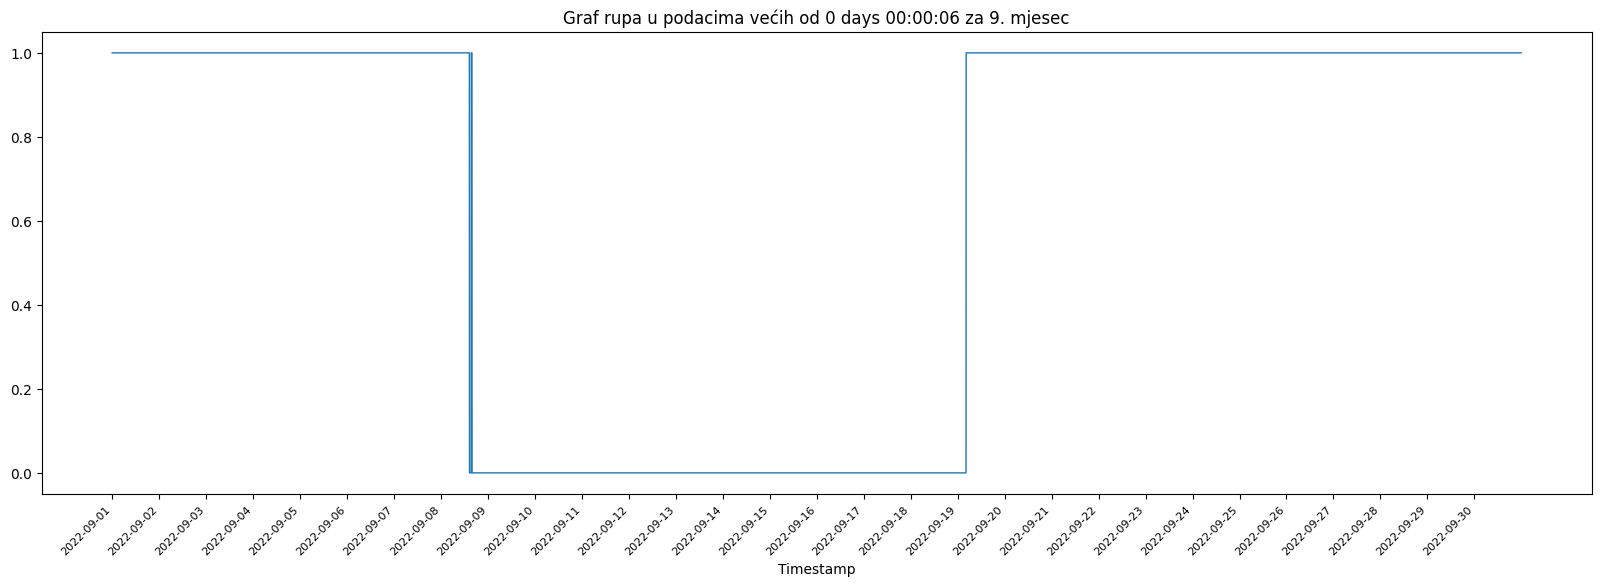

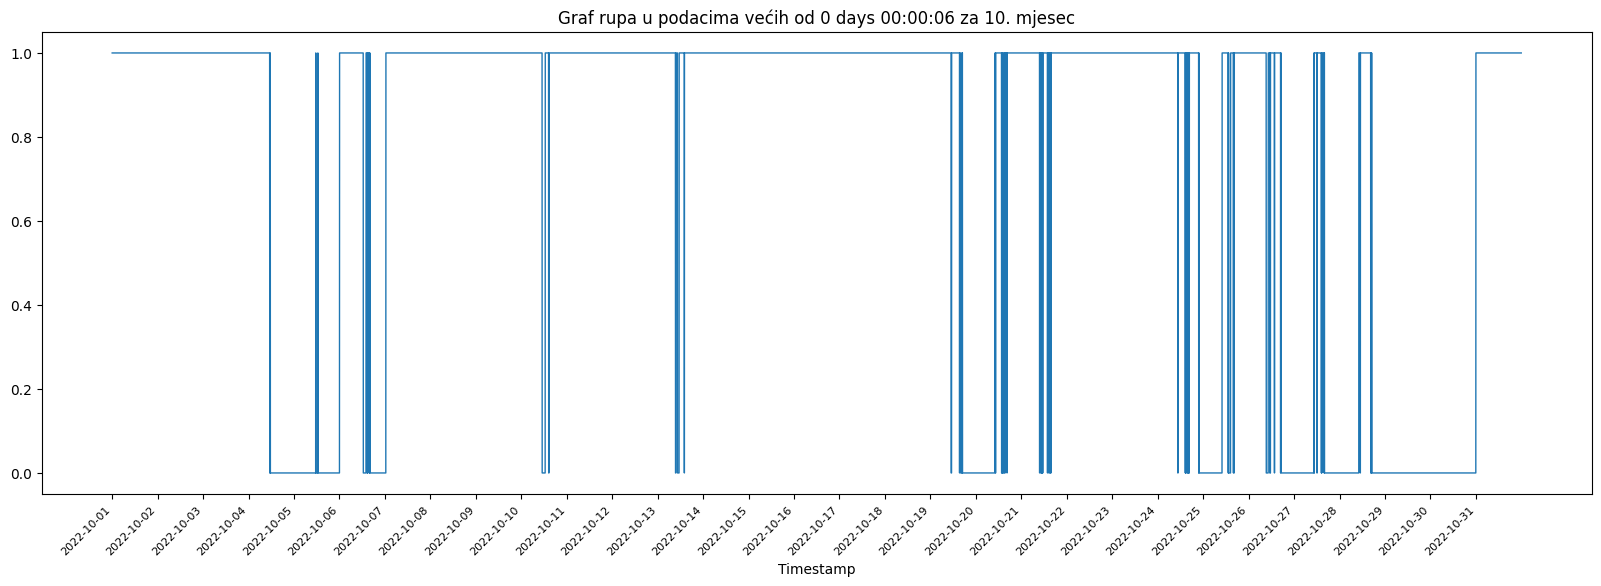

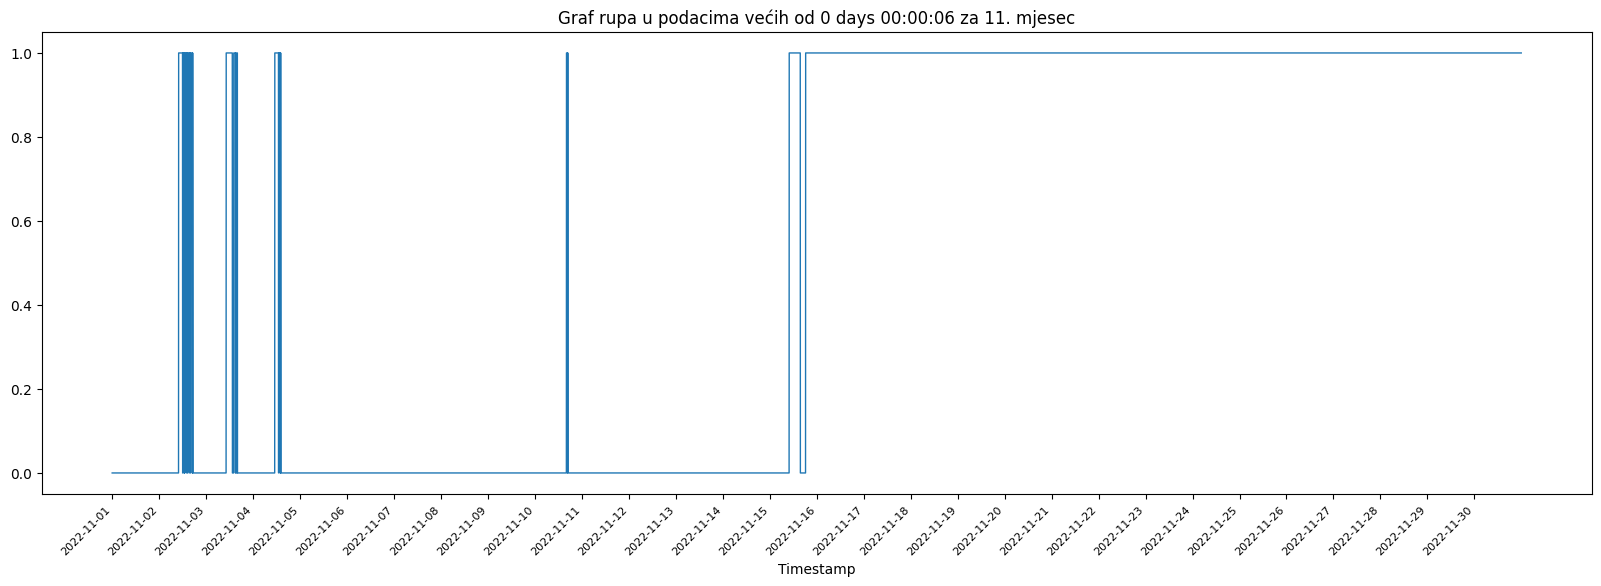

In [9]:
step=pd.to_timedelta('00:00:06')
for i in range(4,12):
    make_graph(i, step)